In [11]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld_env import get_task1_gridworld, get_task2_gridworld, get_task3_gridworld
from utils import paint_gridworld

## A Look Around GridWorld

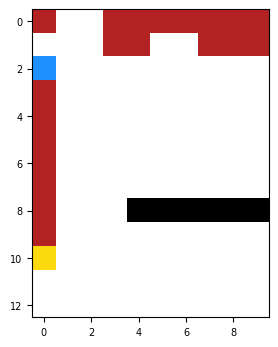

In [12]:
# Initiating the Environment. The method get_task1_gridworld
# initialises the environment for the task 1. Similarly there are methods to initialise the environment 
# for the other tasks
env1 = get_task1_gridworld()

# This is how the environment looks like
paint_gridworld(env1, figsize=(4,4), ticksize=7)

## Example of running a simulation 

In [13]:
reward_lst = []

# Initialise the environment
# An arbitary gamma value is used here. You may need to change this!
env1 = get_task1_gridworld()

# Reset the environment to start from the starting location. 
# The reset() method returns the state, reward, and whether the episode is done or not
# More information can be found under the definition of the method
_, state, reward, done = env1.reset()
reward_lst.append(reward)

# While the trial is not done, i.e. the agent has not fallen into lava,
# the maximum length of the episode has not been exceeded, and the target has not been reached
while not done:
    
    # Take a step using the step() function and passing in one of the available actions [0, 1, 2, 3] 
    # corresponding to ['N', 'S', 'E', 'W']
    # More information can be found under the definition of the method
    # In this very simple example for each step we choose a random action
    _, state, reward, done = env1.step(np.random.choice(4))
    reward_lst.append(reward)

print(f'Collected rewards of an episode: {reward_lst}')

Collected rewards of an episode: [0, 0.0, 0.0, 0.0, 0.0, -10.0]


In [ ]:
class Q_agent():
  # The solve method should take the n_episodes and env as a parameter, 
  # but otherwise you can modify the definition of this method
  def solve(self, env, n_episodes=1):
    """
    Solve a given GridWorld environment using SARSA
    input: env {GridWorld object} -- GridWorld to solve
    output:
      - policy {np.array} -- Optimal policy found to solve the given GridWorld environment
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each trial
      - total_steps {list of float} -- Corresponding list of successive total non-discounted sum of steps for each trial
    """

    # Initialise your variables

    ####
    # Add your code here
    # WARNING: this agent only has access to env.reset() and env.step()
    # You should not use env.get_absorbing() to compute any value
    ####
    
    
    
    
    # You may use these outputs to plot graphs
    return policy, total_rewards, total_steps


In [ ]:
class SARSA_agent():
  # The solve method should take the n_episodes and env as a parameter, 
  # but otherwise you can modify the definition of this method
  def solve(self, env, n_episodes=500, 
             # Extra parameters:
            gamma=0.1, alpha=0.1, epsilon=0.1, ):
    """
    Solve a given GridWorld environment using SARSA
    input: env {GridWorld object} -- GridWorld to solve
    output:
      - policy {np.array} -- Optimal policy found to solve the given GridWorld environment
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each trial
      - total_steps {list of float} -- Corresponding list of successive total non-discounted sum of steps for each trial
    """

    # Initialise your variables

    ####
    # Add your code here
    # WARNING: this agent only has access to env.reset() and env.step()
    # You should not use env.get_absorbing() to compute any value
    ####
    
    
    # You may use these outputs to plot graphs
    return policy, total_rewards, total_steps

# Task 1 - Single Target, Deterministic Rewards:

In [ ]:
# Example of Hyperparameters
# This is just an example, you can add to this depending on which method you utilise

gamma = 0.3
# Alpha === Learning Rate
alpha = 0.5
epsilon = 0.6
n_episodes = 500

In [ ]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env1 = get_task1_gridworld()

In [ ]:
# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env1, gamma=gamma, alpha=alpha, epsilon=epsilon, n_episodes=500)

In [ ]:
# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env1)

In [ ]:
# Do your plots below! Include any new function definitions in this jupyter notebook!

# Task 2 - Dual Targets with Stochastic Rewards

In [ ]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env2 = get_task2_gridworld()

In [ ]:
# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env2)

In [ ]:
# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env2)

In [ ]:
# Do your plots below! Include any new function definitions in this jupyter notebook!

# Task 3 - Stochastic Transitions and Rewards

In [ ]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env3 = get_task3_gridworld()

In [ ]:
# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env3)

In [ ]:
# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env3)

In [ ]:
# Do your plots below! Include any new function definitions in this jupyter notebook!